# Palo - Progetto Fine Anno

In [44]:
#librerie necessarie
import geopandas as gpd
import pandas as pd
from shapely import wkt
import contextily as ctx
import os.path

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
#!pip install git+https://github.com/rossant/ipycache.git
%load_ext ipycache

The ipycache extension is already loaded. To reload it, use:
  %reload_ext ipycache


In [47]:
download = False

<h3>Reading ShapeFile - piste_ciclabili.zip</h3>

In [48]:
#%%cache --cachedir cache piste.pkl piste
#piste = gpd.read_file('zip://piste_ciclabili.zip')

In [49]:
#piste.head(3)

<h3>ShapeFile to GitHub CSV</h3>

* <h4>Writing CSV file</h4>

In [50]:
#uploaded file to https://github.com/palo-landrae/palo-opendata
if (download):
    if not os.path.exists('data/piste_ciclabili.csv'):
        piste.to_csv('data/piste_ciclabili.csv', index = False, header = True, sep=';')

* <h4>Reading CSV file from GitHub</h4>

In [51]:
%%cache --cachedir cache piste_csv.pkl piste_csv url crs

#inserire url e crs del file csv desiderato
url = "https://raw.githubusercontent.com/palo-landrae/palo-opendata/master/dati/piste_ciclabili.csv"
crs = "epsg:4326"

temp = pd.read_csv(url, sep=';')
temp['geometry'] = temp['geometry'].apply(wkt.loads)
piste_csv = gpd.GeoDataFrame(temp, crs=crs)

[Skipped the cell's code and loaded variables crs, piste_csv, url from file 'c:\Users\Palo\source\Informatica\DontuPalo\notebook\cache\piste_csv.pkl'.]


In [52]:
piste_csv.head(3)

,id_amat,id_via,anagrafica,gerarchia,rete,tipologia,sede,marcia,norma,lunghezza,geometry
0,9001,1064.0,PIAZZA VENTICINQUE APRILE,NaN,urbana,percorso promiscuo - pedonale e ciclabile,carreggiata,bidirezionale,FACILITAZIONE - area pedonale,43.0,"LINESTRING (9.18700 45.48095, 9.18696 45.48085..."
1,9002,3377.0,VIA GIACOMO MEDICI DEL VASCELLO,NaN,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,465.0,"LINESTRING (9.24192 45.43931, 9.24202 45.43939..."
2,9003,3377.0,VIA GIACOMO MEDICI DEL VASCELLO,NaN,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,60.0,"LINESTRING (9.23979 45.43996, 9.23991 45.43998..."


<h3>ShapeFile to GitHub GeoJSON</h3>

* <h4>Writing GeoJSON file</h4>

In [53]:
#uploaded file to https://github.com/palo-landrae/palo-opendata
if (download):
    if not os.path.exists('data/piste_ciclabili.geojson'):
        piste.to_file('data/piste_ciclabili.geojson', driver="GeoJSON")  

* <h4>Reading GeoJSON file from GitHub</h4>

In [54]:
%%cache --cachedir cache piste_geojson.pkl piste_geojson

piste_geojson = gpd.read_file('https://raw.githubusercontent.com/palo-landrae/palo-opendata/master/dati/piste_ciclabili.geojson')

[Skipped the cell's code and loaded variables piste_geojson from file 'c:\Users\Palo\source\Informatica\DontuPalo\notebook\cache\piste_geojson.pkl'.]


In [55]:
piste_geojson.head(3)

,id_amat,id_via,anagrafica,gerarchia,rete,tipologia,sede,marcia,norma,lunghezza,geometry
0,9001,1064,PIAZZA VENTICINQUE APRILE,None,urbana,percorso promiscuo - pedonale e ciclabile,carreggiata,bidirezionale,FACILITAZIONE - area pedonale,43.0,"LINESTRING (9.18700 45.48095, 9.18696 45.48085..."
1,9002,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,465.0,"LINESTRING (9.24192 45.43931, 9.24202 45.43939..."
2,9003,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,60.0,"LINESTRING (9.23979 45.43996, 9.23991 45.43998..."


In [56]:
%%cache --cachedir cache anagrafiche.pkl anagrafiche

anagrafiche = piste.groupby(by='anagrafica').count().reset_index()[['anagrafica','geometry']].rename(columns={'geometry' : 'n_geometry'})

[Skipped the cell's code and loaded variables anagrafiche from file 'c:\Users\Palo\source\Informatica\DontuPalo\notebook\cache\anagrafiche.pkl'.]


In [57]:
anagrafiche.head(3)

,anagrafica,n_geometry
0,ALZAIA NAVIGLIO GRANDE,11
1,ALZAIA NAVIGLIO PAVESE,3
2,AREA VERDE CITYLIFE,2


In [58]:
%%cache --cachedir cache piste_sorted.pkl piste_sorted

piste_sorted = pd.DataFrame(piste).sort_values(by='anagrafica').reset_index()
piste_sorted = gpd.GeoDataFrame(pisteSorted, crs=crs)

[Skipped the cell's code and loaded variables piste_sorted from file 'c:\Users\Palo\source\Informatica\DontuPalo\notebook\cache\piste_sorted.pkl'.]


In [59]:
piste_sorted.head(3)

,index,id_amat,id_via,anagrafica,gerarchia,rete,tipologia,sede,marcia,norma,lunghezza,geometry
0,9,9013,5144,ALZAIA NAVIGLIO GRANDE,None,urbana,percorso promiscuo - pedonale e ciclabile,carreggiata,bidirezionale,FACILITAZIONE - area pedonale,31.0,"LINESTRING (9.16856 45.45059, 9.16839 45.45056..."
1,930,9982,5144,ALZAIA NAVIGLIO GRANDE,None,urbana,percorso promiscuo - pedonale e ciclabile,carreggiata,bidirezionale,FACILITAZIONE - area pedonale,219.0,"LINESTRING (9.17117 45.45113, 9.16856 45.45059..."
2,682,9730,5144,ALZAIA NAVIGLIO GRANDE,None,urbana,percorso promiscuo - pedonale e ciclabile,passerella,bidirezionale,non regolamentato - a norma,44.0,"LINESTRING (9.16768 45.45036, 9.16724 45.45027..."


In [60]:
%%cache --cachedir cache piste_united.pkl piste_united

from shapely.geometry import Point

s = gpd.GeoSeries()
u = gpd.GeoSeries()
crs = piste.crs
df = pd.DataFrame({'anagrafica': ['-'], 'geometry': [Point(1,1)]})

for i in range (0, len(anagrafiche)):
    for j in range(0, anagrafiche.iloc[i][1]):
        x = piste_sorted[piste_sorted['anagrafica'] == anagrafiche.iloc[i][0]]
        s = s.append(x['geometry'])
        
    u = gpd.GeoSeries(s.unary_union)
    new_row = {'anagrafica': anagrafiche.iloc[i][0], 'geometry': str(u.values[0])}
    df = df.append(new_row, ignore_index=True)
    s = gpd.GeoSeries()
    
df = df.drop(0).reset_index(drop=True)
df['geometry'] = df['geometry'].apply(wkt.loads)
piste_united = gpd.GeoDataFrame(df, crs=piste_sorted.crs)

[Skipped the cell's code and loaded variables piste_united from file 'c:\Users\Palo\source\Informatica\DontuPalo\notebook\cache\piste_united.pkl'.]


In [61]:
piste_united.head(3)

,anagrafica,geometry
0,ALZAIA NAVIGLIO GRANDE,"MULTILINESTRING ((9.16856 45.45059, 9.16839 45..."
1,ALZAIA NAVIGLIO PAVESE,"MULTILINESTRING ((9.17346 45.43338, 9.17271 45..."
2,AREA VERDE CITYLIFE,"MULTILINESTRING ((9.15629 45.47687, 9.15629 45..."


In [62]:
#uploaded file to https://github.com/palo-landrae/palo-opendata
if (download):
    if not os.path.exists('data/piste_ciclabili_united.geojson'):
        piste_united.to_file('data/piste_ciclabili_united.geojson', driver="GeoJSON")  

<AxesSubplot:>

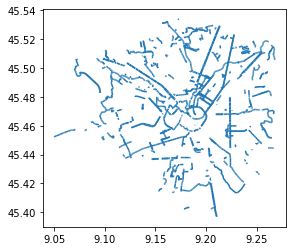

In [63]:
piste_united.plot()

In [64]:
%%cache --cachedir cache piste_centroid.pkl piste_centroid

from shapely.geometry import Point

s = gpd.GeoSeries()
u = gpd.GeoSeries()
crs = piste.crs
df = pd.DataFrame({'anagrafica': ['-'], 'geometry': [Point(1,1)]})

for i in range (0, len(anagrafiche)):
    for j in range(0, anagrafiche.iloc[i][1]):
        x = piste_sorted[piste_sorted['anagrafica'] == anagrafiche.iloc[i][0]]
        s = s.append(x['geometry'])
        
    u = gpd.GeoSeries(s.unary_union)
    new_row = {'anagrafica': anagrafiche.iloc[i][0], 'geometry': str(u.values[0].centroid)}
    df = df.append(new_row, ignore_index=True)
    s = gpd.GeoSeries()
    
df = df.drop(0).reset_index(drop=True)
df['geometry'] = df['geometry'].apply(wkt.loads)
piste_centroid = gpd.GeoDataFrame(df, crs=piste_sorted.crs)

[Skipped the cell's code and loaded variables piste_centroid from file 'c:\Users\Palo\source\Informatica\DontuPalo\notebook\cache\piste_centroid.pkl'.]


<AxesSubplot:>

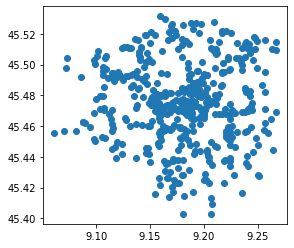

In [65]:
piste_centroid.plot()

In [66]:
#uploaded file to https://github.com/palo-landrae/palo-opendata
if (download):
    if not os.path.exists('data/piste_centroid.json'):
        piste_centroid.to_file('data/piste_centroid.json', driver="GeoJSON")  

In [67]:
%%cache --cachedir cache punti_percorso.pkl punti_percorso

punti_percorso = gpd.read_file('data/text.json')

[Skipped the cell's code and loaded variables punti_percorso from file 'c:\Users\Palo\source\Informatica\DontuPalo\notebook\cache\punti_percorso.pkl'.]


In [68]:
punti_percorso.head(3)

,geometry
0,POINT (9.20545 45.49348)
1,POINT (9.20536 45.49339)
2,POINT (9.20529 45.49333)


In [69]:
%%cache --cachedir cache percorso.pkl percorso

from shapely.geometry import Point, LineString

df = pd.DataFrame({'geometry': [Point(1,1)]})
s = gpd.GeoSeries()
for i in range(0,len(temp)-1):
    new_row = {'geometry': str(LineString([punti_percorso.iloc[i]['geometry'], punti_percorso.iloc[i+1]['geometry']]))}
    df = df.append(new_row, ignore_index=True)
    
df = df.drop(0).reset_index(drop=True)
df['geometry'] = df['geometry'].apply(wkt.loads)
percorso = gpd.GeoDataFrame(df, crs=crs)

[Skipped the cell's code and loaded variables percorso from file 'c:\Users\Palo\source\Informatica\DontuPalo\notebook\cache\percorso.pkl'.]


<AxesSubplot:>

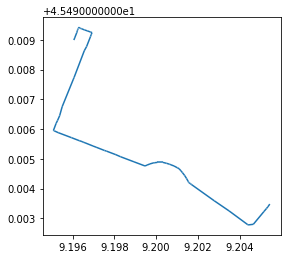

In [70]:
percorso.plot()

In [71]:
percorso.head(3)

,geometry
0,"LINESTRING (9.20545 45.49348, 9.20536 45.49339)"
1,"LINESTRING (9.20536 45.49339, 9.20529 45.49333)"
2,"LINESTRING (9.20529 45.49333, 9.20517 45.49323)"


In [72]:
%%cache --cachedir cache buffer.pkl buffer
buffer = percorso.to_crs(epsg='3857').buffer(5).squeeze().to_crs(epsg='4326')
buffer.head(3)

[Skipped the cell's code and loaded variables buffer from file 'c:\Users\Palo\source\Informatica\DontuPalo\notebook\cache\buffer.pkl'.]


In [73]:
%%cache --cachedir cache gdfIntersect.pkl gdfIntersect

intersect = piste_united.intersection(buffer.unary_union).to_frame()
df = piste_united['anagrafica'].to_frame().join(intersect)
gdfIntersect = df.rename(columns={0:'geometry'}).set_geometry('geometry')
gdfIntersect = gdfIntersect[~gdfIntersect['geometry'].is_empty]
gdfIntersect

[Skipped the cell's code and loaded variables gdfIntersect from file 'c:\Users\Palo\source\Informatica\DontuPalo\notebook\cache\gdfIntersect.pkl'.]


In [74]:
%%cache --cachedir cache gdfIntersect2.pkl gdfIntersect2
gdfIntersect2 = percorso[buffer.intersects(gdfIntersect.unary_union)]
gdfIntersect2.head()

[Skipped the cell's code and loaded variables gdfIntersect2 from file 'c:\Users\Palo\source\Informatica\DontuPalo\notebook\cache\gdfIntersect2.pkl'.]


In [75]:
%%cache --cachedir cache percorso_centroid.pkl percorso_centroid

from shapely.geometry import Point

s = gpd.GeoSeries()
u = gpd.GeoSeries()
crs = piste.crs
df = pd.DataFrame({'geometry': [Point(1,1)]})

for i in range (0, len(gdfIntersect)):
    new_row = {'geometry': str(gdfIntersect.iloc[i].values[1].centroid)}
    df = df.append(new_row, ignore_index=True)
    s = gpd.GeoSeries()
    
df = df.drop(0).reset_index(drop=True)
df['geometry'] = df['geometry'].apply(wkt.loads)
percorso_centroid = gpd.GeoDataFrame(df, crs=piste_sorted.crs)

[Skipped the cell's code and loaded variables percorso_centroid from file 'c:\Users\Palo\source\Informatica\DontuPalo\notebook\cache\percorso_centroid.pkl'.]


<AxesSubplot:>

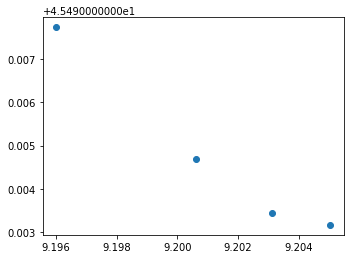

In [76]:
percorso_centroid.plot()

In [77]:
%%cache --cachedir cache punti_intersect.pkl punti_intersect

from shapely.geometry import Point

s = gpd.GeoSeries()
u = gpd.GeoSeries()
crs = piste.crs
df = pd.DataFrame({'anagrafica' : '-', 'geometry': [Point(1,1)]})

for i in range (0, len(gdfIntersect)):
    new_row = {'anagrafica' : gdfIntersect.iloc[i].values[0],'geometry': str(gdfIntersect.iloc[i].values[1].interpolate(gdfIntersect.iloc[i].values[1].project(percorso_centroid.iloc[i].values[0])))}
    df = df.append(new_row, ignore_index=True)
    s = gpd.GeoSeries()
    
df = df.drop(0).reset_index(drop=True)
df['geometry'] = df['geometry'].apply(wkt.loads)
punti_intersect = gpd.GeoDataFrame(df, crs=piste_sorted.crs)
punti_intersect

[Skipped the cell's code and loaded variables punti_intersect from file 'c:\Users\Palo\source\Informatica\DontuPalo\notebook\cache\punti_intersect.pkl'.]


In [78]:
#uploaded file to https://github.com/palo-landrae/palo-opendata
if (download):
    if not os.path.exists('data/punti_intersect.json'):
        punti_intersect.to_file('data/punti_intersect.json', driver="GeoJSON")  

[Skipped the cell's code and loaded variables  from file 'c:\Users\Palo\source\Informatica\DontuPalo\notebook\cache\final_plot.pkl'.]


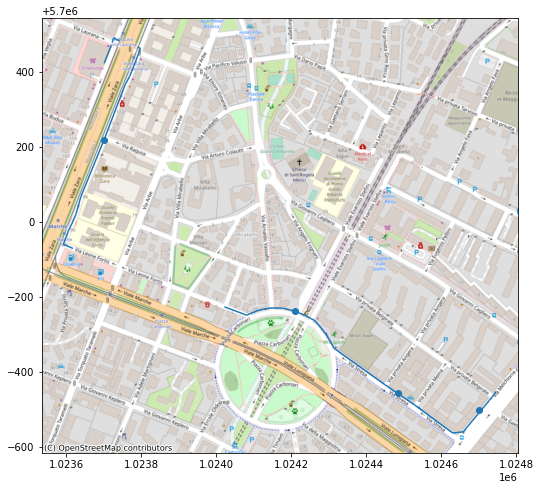

In [79]:
%%cache --cachedir cache final_plot.pkl

ax = gdfIntersect2.to_crs(epsg='3857').plot(figsize=(10,8))
punti_intersect.to_crs(epsg='3857').plot(ax=ax)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)